
3a: Trapetsregeln
Test: I_exact=20.7781, I_trapets=20.7830
Fel: 0.004926

3b: Konvergensstudie
    n        h          Fel
   10  0.20000     4.91e-01
   20  0.10000     1.23e-01
   40  0.05000     3.08e-02
   80  0.02500     7.70e-03
Noggrannhetsordning p ≈ 2.00

3c: Energi 2014-2022
Total energi: 277.55 kWår

3d: Konvergens (diskret)
h=1: I=277.55
h=2: I=281.20
h=4: I=295.56
Noggrannhetsordning p ≈ -1.98

3e: Richardson & Simpson
Richardson: 276.33 kWår
Simpson:    276.33 kWår
Differens:  0.0000

3f: Exponentiell modell
a=11.9990, b=0.2300


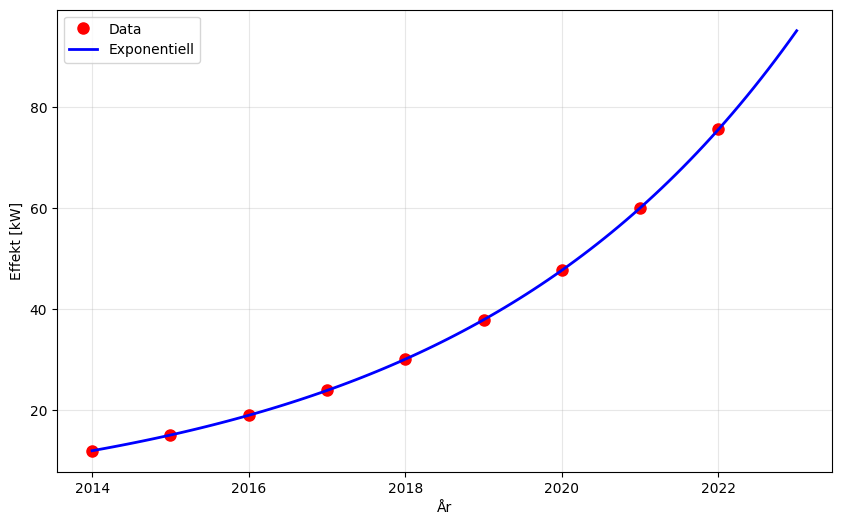


3g: Projektbedömning
Effekt 2023: 95.10 kW
Total energi 2014-2023: 362.88 kWår

Villkor 1 (>100 kW): NEJ
Villkor 2 (>350 kWår): JA

Projektet är lyckat


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def clear_console():
    os.system('clear')

t_sol = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
f_sol = np.array([12.00, 15.10, 19.01, 23.92, 30.11, 37.90, 47.70, 60.03, 75.56])

def trapets(f, n, limits):
    # Från py4.py - trapetskvadratur
    a, b = limits
    h = (b - a) / n
    
    if callable(f):
        x = np.linspace(a, b, n+1)
        y = f(x)
    else:
        y = f
    
    I = h * (y[0] + 2*np.sum(y[1:-1]) + y[-1]) / 2
    return I

def uppgift3a():
    print("\n3a: Trapetsregeln")
    
    # Test från py4.py
    test_f = lambda x: x**3 * np.exp(x)
    I_exact = 6 + 2*np.exp(2)
    I_test = trapets(test_f, 100, [0, 2])
    
    print(f"Test: I_exact={I_exact:.4f}, I_trapets={I_test:.4f}")
    print(f"Fel: {abs(I_exact - I_test):.6f}")

def uppgift3b():
    print("\n3b: Konvergensstudie")
    
    test_f = lambda x: x**3 * np.exp(x)
    I_exact = 6 + 2*np.exp(2)
    
    print(f"{'n':>5} {'h':>8} {'Fel':>12}")
    
    errors = []
    for n in [10, 20, 40, 80]:
        I_n = trapets(test_f, n, [0, 2])
        e = abs(I_exact - I_n)
        errors.append(e)
        print(f"{n:5d} {2/n:8.5f} {e:12.2e}")
    
    # Noggrannhetsordning från py4.py
    p_avg = np.mean([np.log2(errors[i]/errors[i+1]) for i in range(len(errors)-1)])
    print(f"Noggrannhetsordning p ≈ {p_avg:.2f}")

def uppgift3c():
    print("\n3c: Energi 2014-2022")
    
    I_total = trapets(f_sol, len(f_sol)-1, [2014, 2022])
    print(f"Total energi: {I_total:.2f} kWår")
    
    return I_total

def uppgift3d():
    print("\n3d: Konvergens (diskret)")
    
    I_vals = []
    for h in [1, 2, 4]:
        idx = range(0, len(t_sol), h)
        I_h = trapets(f_sol[idx], len(idx)-1, [t_sol[idx[0]], t_sol[idx[-1]]])
        I_vals.append(I_h)
        print(f"h={h}: I={I_h:.2f}")
    
    if len(I_vals) >= 3:
        p = np.log2(abs(I_vals[1] - I_vals[0]) / abs(I_vals[2] - I_vals[1]))
        print(f"Noggrannhetsordning p ≈ {p:.2f}")
    
    return I_vals

def uppgift3e(I_vals):
    print("\n3e: Richardson & Simpson")
    
    # Richardson från py4.py
    I_rich = I_vals[0] + (I_vals[0] - I_vals[1]) / 3
    print(f"Richardson: {I_rich:.2f} kWår")
    
    # Simpson från py4.py
    h = 1
    I_simp = h * (f_sol[0] + 4*np.sum(f_sol[1:-1:2]) + 
                  2*np.sum(f_sol[2:-2:2]) + f_sol[-1]) / 3
    print(f"Simpson:    {I_simp:.2f} kWår")
    print(f"Differens:  {abs(I_rich - I_simp):.4f}")

def uppgift3f():
    print("\n3f: Exponentiell modell")
    
    # Från py3.py - linjärisering
    t_shift = t_sol - 2014
    ln_f = np.log(f_sol)
    
    A = np.column_stack([np.ones(len(t_shift)), t_shift])
    c = np.linalg.lstsq(A, ln_f, rcond=None)[0]
    
    a = np.exp(c[0])
    b = c[1]
    print(f"a={a:.4f}, b={b:.4f}")
    
    t_plot = np.linspace(2014, 2023, 100)
    f_model = a * np.exp(b * (t_plot - 2014))
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_sol, f_sol, 'ro', markersize=8, label='Data')
    plt.plot(t_plot, f_model, 'b-', linewidth=2, label='Exponentiell')
    plt.xlabel('År')
    plt.ylabel('Effekt [kW]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return a, b

def uppgift3g(a, b):
    print("\n3g: Projektbedömning")
    
    f_2023 = a * np.exp(b * 9)
    print(f"Effekt 2023: {f_2023:.2f} kW")
    
    t_ext = np.append(t_sol, 2023)
    f_ext = np.append(f_sol, f_2023)
    I_2023 = trapets(f_ext, len(f_ext)-1, [2014, 2023])
    print(f"Total energi 2014-2023: {I_2023:.2f} kWår")
    
    print(f"\nVillkor 1 (>100 kW): {'JA' if f_2023 > 100 else 'NEJ'}")
    print(f"Villkor 2 (>350 kWår): {'JA' if I_2023 > 350 else 'NEJ'}")
    
    if f_2023 > 100 or I_2023 > 350:
        print("\nProjektet är lyckat")
    else:
        print("\nProjektet uppfyller inte kraven")

def main():
    clear_console()
    uppgift3a()
    uppgift3b()
    uppgift3c()
    I_vals = uppgift3d()
    uppgift3e(I_vals)
    a, b = uppgift3f()
    uppgift3g(a, b)
    

if __name__ == "__main__":
    main() 